<table width="100%" border="0">
  <tr>    
  <td><img src="./images/ing.png" alt="" align="left" /></td>
  <td><img src="./images/ucv.png" alt="" align="center" height="100" width="100" /></td>
  <td><img src="./images/mec.png" alt="" align="right"/></td>
  </tr>
</table>

<br>

<h1 style="text-align: center;"> Curso de Python para Ingenieros Mecánicos </h1> 
<h3 style="text-align: center;"> Por: Eduardo Vieira</h3>
<br>
<br>
<h1 style="text-align: center;">  SciPy - Librería de algorítmos científicos para Python </h1> 
<br>

In [30]:
# ¿qué hace esta línea? La respuesta mas adelante
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

## Introducción

El paquete SciPy agrega características a los algorítmos de bajo nivel de NumPy para arreglos multidimensionales, y provee un gran número de algorítmos de alto nivel de uso científico. Algunos de los tópicos que cubre SciPy son:

* Funciones especiales ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integración ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimización ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolación ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Transformada de Fourier ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Procesamiento de señales ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Álgebra lineal ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Problemas de Eigenvalores de matrices dispersas ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Estadística ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Procesamiento de imágenes multi-dimensional ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Entrada/Salida desde/hacia archivos ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

Cada uno de estos submódulos provee un muchas funciones y clases que pueden ser usadas para resolver problemas en sus respectivos tópicos.

En esta clases veremos cómo usar algunos de estos subpaquetes.

Para acceder al paquete SciPy en un programa Python, comenzamos importando todo desde el módulo `scipy`.

In [31]:
import scipy as sp
import numpy as np

## Funciones Especiales

En muchos problemas de física computacional son importantes varias funciones matemáticas especiales. SciPy provee implementaciones de muchas de estas funciones especiales. Para más detalles, ver la lista de funciones en la documentación http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special. 

Para demostrar el uso típico de estas funciones especiales nos concentraremos en las funciones de Bessel:

In [32]:
#
# El módulo scipy.special incluye muchas funciones de Bessel 
# Aquí usaremos las funciones jn e yn, que son las funciones de Bessel 
# de primera y segunda especie, y de orden real. Incluimos también las  
# funciones jn_zeros e yn_zeros que entregan los ceros de las
# funciones jn e yn.
#
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [33]:
n = 0    # orden de la función
x = 0.0

# Función de Bessel de primera especie
print("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1.0
# Función de Bessel de segunda especie
print("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


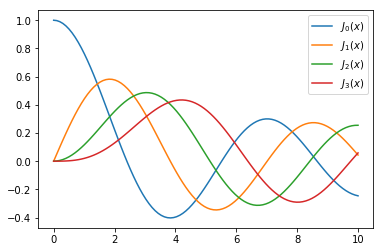

In [34]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend()

In [35]:
# ceros de las funciones de Bessel
n = 0 # orden
m = 4 # número de raices a calcular
jn_zeros(n, m)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444])

## Integración

### Integración numérica: cuadraturas

La evaluación numérica de una función, del tipo

$\displaystyle \int_a^b f(x) dx$

es llamada *cuadratura numérica*, o simplemente *cuadratura*. SciPy suministra funciones para diferentes tipos de cuadraturas, por ejemplo las funciones `quad`, `dblquad` y `tplquad` para calcular integrales simples, dobles o triples, respectivamente.

In [36]:
from scipy.integrate import quad, dblquad, tplquad

Las función `quad` acepta una gran cantidad de argumentos opcionales, que pueden ser usados para ajustar detalles del comportamiento de la función (ingrese `help(quad)` para más detalles).

El uso básico es el siguiente:

In [37]:
# define una función simple para ser integrada
def f(x):
    return x

In [38]:
x_inf = 0 # el límite inferior de x
x_sup = 1 # el límite superior de x

val, errabs = quad(f, x_inf, x_sup)

print("valor de la integral =", val, ", error absoluto =", errabs)

valor de la integral = 0.5 , error absoluto = 5.551115123125783e-15


Si necesitamos incluir argumento extras en la función integrando podemos usar el argumento `args`:

In [39]:
def integrando(x, n):
    """
    función de Bessel de primera especie y orden n. 
    """
    return jn(n, x)


x_inf = 0 # el límite inferior de x
x_sup = 10 # el límite superior de x

val, errabs = quad(integrando, x_inf, x_sup, args=(3,)) # evalua la integral con n=3

print(val, errabs)

0.7366751370811073 9.389126882496403e-13


Para funciones simples podemos usar la función lambda function (función anónima) en lugar de definir explícitamente una función para el integrando:

In [40]:
val, errabs = quad(lambda x: np.exp(-x ** 2), -np.Inf, np.Inf) # Inf = infinito!

print("resultado numérico  =", val, errabs)

analitico = np.sqrt(np.pi)
print("analitico =", analitico)

resultado numérico  = 1.7724538509055159 1.4202636780944923e-08
analitico = 1.77245385091


Como se muestra en este ejemplo, podemos usar 'Inf' y '-Inf' como límites de la integral.

Integrales de dimensión mayor se evalúan de forma similar:

In [41]:
def integrando(x, y):
    return np.exp(-x**2-y**2)

x_inf = 0  
x_sup = 10
y_inf = 0
y_sup = 10

val, errabs = dblquad(integrando, x_inf, x_sup, lambda x : y_inf, lambda x: y_sup)

print(val, errabs)

0.7853981633974476 1.3753098510218528e-08


Note como requerimos incorporar funciones lambda para los límites de la integración en y, ya que estos límites pueden en general ser funciones de x.

### Ecuaciones diferenencias ordinarias (EDOs)

SciPy provee dos formas diferentes para resolver EDOs: Una API (Interfaz de programación de aplicaciones, del inglés "Application programming interface") basada en la función `odeint`, y una API orientada al objeto basada en la clases `ode`. Usualmentey `odeint` es más simplea de usar, pero la clase `ode` ofrece niveles de control más finos.

Aquí usaremos las funciones `odeint`. Para mayor información sobre las clases `ode`, use `help(ode)`. Hace casi todo lo que hace `odeint`, pero de una forma más orientada al objeto.

Para usar `odeint`, primero importelo desde el módulo `scipy.integrate`:

In [42]:
from scipy.integrate import odeint, ode

Un sistema de EDOs es usualmente formulado en forma estándar antes de ser resuelto numéricamente. La forma estánder es:

$y' = f(y, t)$

donde 

$y = [y_1(t), y_2(t), ..., y_n(t)]$ 

y $f$ es una función que determina las derivadas de la función $y_i(t)$. Para resolver la EDO necesitamos conocer la función $f$ y una condición inicial, $y(0)$.

Note que EDOs de orden superior siempre pueden ser escritas en esta forma introduciendo nuevas variables para las derivadas intermedias.

Una vez definida la función `f` y el arreglo `y_0`, podemos usar la función `odeint`:

    y_t = odeint(f, y_0, t)

donde `t` es un arreglo con las coordenadas temporales para las que se resolverá el sistema de EDOs. El resultado `y_t` es un arreglo con una linea para cada punto de tiempo `t`, y donde cada columna corresponde a una solución `y_i(t)` para ese tiempo. 

Veremos cómo implementar `f` e `y_0` en código Python en los siguientes ejemplos.

#### Ejemplo: péndulo doble

Consideremos un problema físico: El péndulo doble compuesto, descrito en más detalle aquí (en inglés): http://en.wikipedia.org/wiki/Double_pendulum.

In [43]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

Las ecuaciones hamiltonianas de movimiento para el péndulo son dadas (ver página de wikipedia):

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

Para que el código Python sea simple de leer, introduzcamos nuevos nombres de variables y la notación vectorial: $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [44]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    El lado derecho de la EDO del péndulo
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * np.cos(x1-x2) * x4)/(16 - 9 * np.cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * np.cos(x1-x2) * x3)/(16 - 9 * np.cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * np.sin(x1-x2) + 3 * (g/L) * np.sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * np.sin(x1-x2) + (g/L) * np.sin(x2))
    
    return [dx1, dx2, dx3, dx4]

In [45]:
# define la condición inicial
x0 = [np.pi/4, np.pi/2, 0, 0]

In [46]:
# tiempos en los que se resolverá la EDO: desde 0 hasta 10 segundos
t = np.linspace(0, 10, 250)

In [47]:
# resuelve el sistema de EDOs
x = odeint(dx, x0, t)

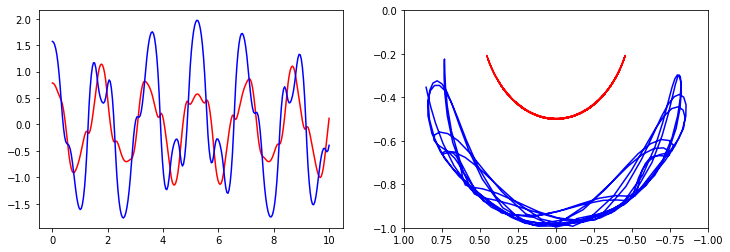

In [48]:
# grafica los ángulos como funciones del tiempo

fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")


x1 = + L * np.sin(x[:, 0])
y1 = - L * np.cos(x[:, 0])

x2 = x1 + L * np.sin(x[:, 1])
y2 = y1 - L * np.cos(x[:, 1])
    
axes[1].plot(x1, y1, 'r', label="pendulo1")
axes[1].plot(x2, y2, 'b', label="pendulo2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

Animación simple del movimiento del péndulo. Veremos cómo crear mejores animaciones en la clase 4.

In [49]:
from IPython.display import clear_output
import time

KeyboardInterrupt: 

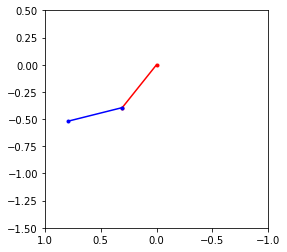

In [61]:
fig, ax = plt.subplots(figsize=(4,4))

for t_idx, tt in enumerate(t[:200]):

    x1 = + L * np.sin(x[t_idx, 0])
    y1 = - L * np.cos(x[t_idx, 0])

    x2 = x1 + L * np.sin(x[t_idx, 1])
    y2 = y1 - L * np.cos(x[t_idx, 1])
    
    ax.cla()    
    ax.plot([0, x1], [0, y1], 'r.-')
    ax.plot([x1, x2], [y1, y2], 'b.-')
    ax.set_ylim([-1.5, 0.5])
    ax.set_xlim([1, -1])

    display(fig)
    clear_output() # comentar si no se observa bien
    
    time.sleep(1)

#### Ejemplo: Oscilador armónico amortiguado

Problemas de EDO son importantes en Física Computacional, de modo que veremos un ejemplo adicional: el oscilador armónico amortiguado. Este problema está bastante bien descrito en wikipedia (en inglés): http://en.wikipedia.org/wiki/Damping.

La ecuación de movimiento para el oscilador amortiguado es:

$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$

donde $x$ es la posición del oscilador, $\omega_0$ la frecuencia, y $\zeta$ es el factor de amortiguamiento. Para escribir esta EDO de segundo orden en la forma estándar, introducimos $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$

$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$

En la implementación de este ejemplo agregaremos algunos argumentos extras a la función del lado derecho de la EDO, en lugar de usar variables glovales como en el ejemplo anterior. Como consecuencia de los argumentos extra, necesitamos pasar un argumento clave `args` a la función `odeint`:

In [62]:
def dy(y, t, zeta, w0):
    """
    El lado derecho de la EDO del oscilador amortiguado
    """
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [63]:
# condición inicial: 
y0 = [1.0, 0.0]

In [65]:
# tiempos en los que se resolvera la EDO
t = np.linspace(0, 10, 1000)
w0 = 2*np.pi*1.0

In [66]:
# resuelve el sistema de EDOs para tres valores diferentes del factor de amortiguamiento

y1 = odeint(dy, y0, t, args=(0.0, w0)) # no amortiguado
y2 = odeint(dy, y0, t, args=(0.2, w0)) # subamortiguado
y3 = odeint(dy, y0, t, args=(1.0, w0)) # amortiguado crítico
y4 = odeint(dy, y0, t, args=(5.0, w0)) # sobreamortiguado

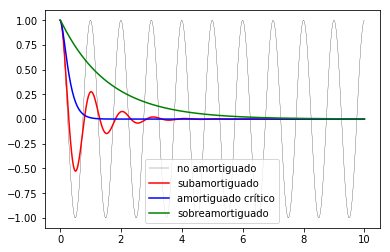

In [68]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="no amortiguado", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="subamortiguado")
ax.plot(t, y3[:,0], 'b', label=u"amortiguado crítico")
ax.plot(t, y4[:,0], 'g', label="sobreamortiguado")
ax.legend();

## Transformada de Fourier

Las transformadas de Fourier son unas de las herramientas universales de la Computación Científica,  que aparece una y otra vez en distintos contextos. SciPy suministra funciones para acceder ala clásica librería [FFTPACK](http://www.netlib.org/fftpack/) de NetLib, que es una librería eficiente y muy bien testeada para FFT, escrita en FORTRAN. La API de SciPy contiene algunas funciones adicionales, pero en general la API está íntimamente relacionada con la librería original en FORTRAN.

Para usar el módulo `fftpack` en un programa Python, debe incluir

In [69]:
from scipy.fftpack import *
from numpy.fft import *

Para demostrar cómo calcular una transformada rápida de Fourier con SciPy, consideremos la FFT de la solución del oscilador armónico amortiguado del ejemplo anterior:

In [70]:
N = len(t)
dt = t[1]-t[0]

# calcula la transformada rápida de Fourier
# y2 es la solución del oscilador subamortiguado del ejemplo anterior
F = fft(y2[:,0]) 

# calcula las frecuencias para las componentes en F
w = fftfreq(N, dt)

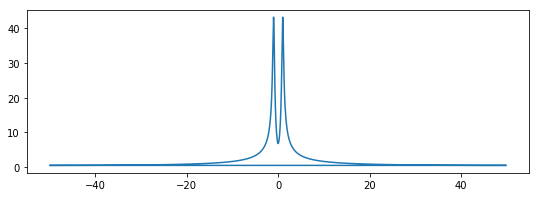

In [72]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w, abs(F));

Como la señal es real, el espectro es simétrico. Por eso, sólo necesitamos graficar la parte que corresponde a las frecuencias positivas. Para extraer esa parte de `w` y `F` podemos usar algunos de los trucos con índices para arreglos NumPy que vimos en la clase 2:

In [74]:
indices = np.where(w > 0) # selecciona sólo los índices de elementos que corresponden a frecuencias positivas
w_pos = w[indices]
F_pos = F[indices]

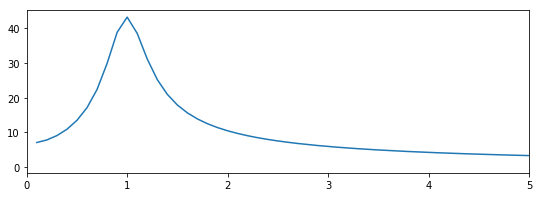

In [75]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);

Como era de esperar, vemos un peak en el espectro centrado alrededor de 1, que es la frecuencia que usamos para el oscilador.

## Álgebra lineal

El módulo de álgebra lineal contiene muchas funciones relacionadas con matrices, incluyendo resolución de ecuaciones lineales, cálculo de valores propios, funciones de matrices (por ejemplo, para exponenciación matricial), varias decomposiciones diferentes (SVD, LU, cholesky), etc. 

Una documentación detallada está disponible aquí: http://docs.scipy.org/doc/scipy/reference/linalg.html

Veremos cómo usar algunas de estas funciones:

#### Sistemas de ecuaciones lineales

Los sistemas de ecuaciones lineales de la forma

$A x = b$

donde $A$ es una matriz y $x,b$ son vectores, pueden ser resueltos del modo siguiente:

In [84]:
A = np.array([[8,2,5], [1,5,2], [7,8,9]])
b = np.array([1,2,3])

In [85]:
x = sp.linalg.solve(A, b)

x

array([ 0.09345794,  0.42990654, -0.12149533])

In [86]:
# verificamos la solución
(A @ x) - b

array([  0.00000000e+00,  -2.22044605e-16,   0.00000000e+00])

Podemos también hacer lo mismo con

$A X = B$,

donde ahora $A, B$ y $X$ son matrices:

In [88]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

In [89]:
X = sp.linalg.solve(A, B)

In [90]:
X

array([[-2.13685075, -3.57244713,  0.03184777],
       [ 3.67899511,  5.64863419,  1.03884467],
       [-1.48854901, -2.56304123, -0.8123652 ]])

In [91]:
# verificamos la solución
(A @ X) - B

array([[ -2.22044605e-16,   4.44089210e-16,   0.00000000e+00],
       [  3.33066907e-16,  -3.33066907e-16,  -1.11022302e-16],
       [ -2.22044605e-16,   7.77156117e-16,   5.55111512e-17]])

#### Valores y vectores propios

El problema de valores propios para la matriz $A$:

$\displaystyle A v_n = \lambda_n v_n$,

donde $v_n$ es el $n$-ésimo vector propio y $\lambda_n$ es el $n$-ésimo valor propio.

Para calcular los vectores propios de una matriz usamos `eigvals` y para calcular tanto los valores como los vectores propios, podemos usar la función `eig`:

In [92]:
evals = sp.linalg.eigvals(A)

In [93]:
evals

array([ 2.17852448+0.j        ,  0.05016343+0.23073068j,
        0.05016343-0.23073068j])

In [94]:
evals, evecs = np.linalg.eig(A)

In [95]:
evals

array([ 2.17852448+0.j        ,  0.05016343+0.23073068j,
        0.05016343-0.23073068j])

In [96]:
evecs

array([[ 0.54554189+0.j        , -0.50487915-0.20561866j,
        -0.50487915+0.20561866j],
       [ 0.61450602+0.j        ,  0.70394734+0.j        ,  0.70394734-0.j        ],
       [ 0.56988279+0.j        , -0.38074115+0.24962439j,
        -0.38074115-0.24962439j]])

Los vectores propios correspondientes al $n$-ésimo valor propio (guardado en `evals[n]`) es la $n$-ésima *columna* en `evecs`, es decir, `evecs[:,n]`. Para verificar esto, intentemos multiplicar los vectores propios con la matriz y comparar el resultado con el producto del vector propio y el valor propio:

In [97]:
n = 1

A @ evecs[:,n] - evals[n] * evecs[:,n]

array([  1.31838984e-16 -2.77555756e-17j,
         6.93889390e-18 -2.49800181e-16j,  -1.38777878e-17 -1.24900090e-16j])

Existen también formas más especializadas para resolver proplemas de valores propios, como por ejemplo `eigh` para matrices hermíticas.

#### Operaciones matriciales

In [98]:
# matriz inversa
sp.linalg.inv(A)

array([[-3.17644694, -1.421148  ,  5.0126219 ],
       [ 5.93182095,  1.48466072, -6.78440453],
       [-3.95967123,  0.27753949,  3.9503001 ]])

In [99]:
# determinante
sp.linalg.det(A)

0.12145931290990894

In [102]:
# norma de distintos órdenes
sp.linalg.norm(A, ord=2), sp.linalg.norm(A, ord=np.Inf)

(2.1974805056383993, 2.297479332099849)

## Matrices dispersas

Las matrices dispersas (sparse matrices) son a menudo útiles en simulaciones numéricas que involucran sistemas grandes, si es que el problema puede ser descrito en forma matricial donde las matrices o vectores contienen mayoritariamente ceros. Scipy tiene buen soporte para las matrices dispersas, con operaciones básicas de álgebra lineal (tales como resolución de ecuaciones, cálculos de valores propios, etc).

Existen muchas estrategias posibles para almacenar matrices dispersas de manera eficiente. Algunas de las más comunes son las así llamadas "formas coordenadas" (CCO), "forma de lista de listas" (LIL), y "compressed-sparse column" CSC (también  "compressed-sparse row", CSR). Cada formato tiene sus ventajas y desventajas. La mayoría de los algorítmos computacionales (resolución de ecuaciones, multiplicación de matrices, etc) pueden ser implementados eficientemente usando los formatos CSR o CSC, pero ellos no son tan intuitivos ni fáciles de inicializar. Por esto, a menudo una matriz dispersa es inicialmente creada en formato COO o LIL (donde podemos agregar elementos a la matriz dispersa eficientemente), y luego convertirlos a CSC o CSR antes de ser usadas en cálculos reales.

Para más información sobre los formatos para matrices dispersas, vea por ejemplo (en inglés): http://en.wikipedia.org/wiki/Sparse_matrix


<img src="./images/sparse.png" alt="" align="center"/>

Cuando creamos una matriz dispersa debemos elegir en qué formato la almacenaremos. Por ejemplo, 

In [107]:
from scipy.sparse import *

In [108]:
# matriz densa
M = np.array([[1,0,0,0], [0,3,0,0], [0,1,1,0], [1,0,0,1]])
M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [109]:
# convierte de densa a dispersa
A = csr_matrix(M); A

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [110]:
# convierte de dispersa a densa
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]], dtype=int64)

Una forma más eficiente de crear matrices dispersas: crear una matriz vacía y llenarla usando indexado de matrices (evita crear una matriz densa potencialmente muy grande)

In [111]:
A = lil_matrix((4,4)) # matriz dispersa vacía de 4x4
A[0,0] = 1
A[1,1] = 3
A[2,2] = A[2,1] = 1
A[3,3] = A[3,0] = 1
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [112]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

Conviertiendo entre distintos formatos de matriz dispersa:

In [113]:
A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in LInked List format>

In [114]:
A = csr_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [115]:
A = csc_matrix(A); A

<4x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

Podemos calcular usando matrices dispersas como lo hacemos con matrices densas:

In [116]:
A.todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  3.,  0.,  0.],
        [ 0.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.]])

In [117]:
(A * A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [118]:
(A @ A).todense()

matrix([[ 1.,  0.,  0.,  0.],
        [ 0.,  9.,  0.,  0.],
        [ 0.,  4.,  1.,  0.],
        [ 2.,  0.,  0.,  1.]])

In [120]:
v = np.array([1,2,3,4])[:,np.newaxis]; v

array([[1],
       [2],
       [3],
       [4]])

In [121]:
# Multiplicación de matriz dispersa - vector denso
A * v

array([[ 1.],
       [ 6.],
       [ 5.],
       [ 5.]])

In [122]:
# el mismo resultado con matriz densa y vector denso
A.todense() * v

matrix([[ 1.],
        [ 6.],
        [ 5.],
        [ 5.]])

## Optimización

La optimización (encontrar el máximo o el mínimo de una funciónn) constituye un campo amplio en matemáticas, y la optimización de funciones complicadas o de muchas variables puede ser complicada. Aquí sólo revisaremos algunos casos muy simples. Para una introducción detallada a la optimización con SciPy, ver (en inglés): http://scipy-lectures.github.com/advanced/mathematical_optimization/index.html

Para usar el módulo de optimización de Scipy hay que importar el módulo `optimize`:

In [123]:
from scipy import optimize

### Encontrando máximos

Veamos primero cómo encontrar el mínimo de una función simple de una variable:

In [124]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

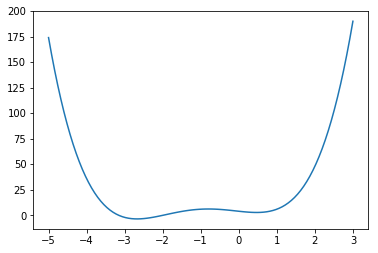

In [127]:
fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x));

Podemos usar la función `fmin_bfgs` para encontrar el mínimo de la función:

In [128]:
x_min = optimize.fmin_bfgs(f, -2) # busca un mínimo local cerca -2
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 8


array([-2.67298151])

In [129]:
optimize.fmin_bfgs(f, 0.5)  # busca un mínimo local cerca 0.5

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([ 0.46961745])

Podemos también usar las funciones `brent` o `fminbound`. Estas funciones tienen una sintaxis algo distinta y usan algoritmos diferentes.

In [130]:
optimize.brent(f)

0.46961743402759754

In [131]:
optimize.fminbound(f, -4, 2)  # busca el mínimo en el intervalo (-4,2)

-2.6729822917513886

### Encontrando las raíces de una función

Para encontrar las soluciones a una ecuación de la forma $f(x) = 0$ podemos usar la función `fsolve`. Ella requiere especificar un punto inicial: 

In [136]:
omega_c = 3.0
def f(omega):
    return np.tan(2*np.pi*omega) - omega_c/omega

/home/eduardo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


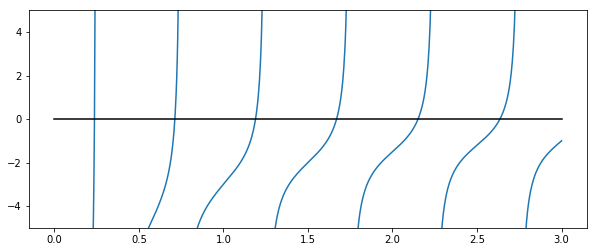

In [139]:
fig, ax  = plt.subplots(figsize=(10,4))
x = np.linspace(0, 3, 1000)
y = f(x)
mask = np.where(abs(y) > 50)
x[mask] = y[mask] = np.NaN # elimina líneas verticales cuando la función cambia de signo
ax.plot(x, y)
ax.plot([0, 3], [0, 0], 'k')
ax.set_ylim(-5,5);

In [140]:
optimize.fsolve(f, 0.1)

array([ 0.23743014])

In [141]:
optimize.fsolve(f, 0.6)

array([ 0.71286972])

In [142]:
optimize.fsolve(f, 1.1)

array([ 1.18990285])

## Interpolación

La interpolación es simple y conveniente en Scipy: La función `interp1d`, cuando se le suministran arreglos describiendo datos X e Y, retorna un objeto que se comporta como una función que puede ser llamada para un valor de x arbitrary (en el rango cubierto por X), y que retorna el correspondiente valor interpolado de y:

In [143]:
from scipy.interpolate import *

In [147]:
def f(x):
    return np.sin(x)

In [151]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simula medidas con error
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

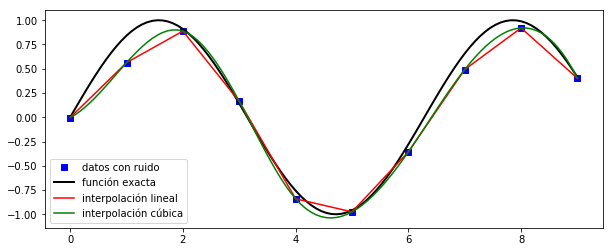

In [152]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='datos con ruido')
ax.plot(x, y_real, 'k', lw=2, label=u'función exacta')
ax.plot(x, y_interp1, 'r', label=u'interpolación lineal')
ax.plot(x, y_interp2, 'g', label=u'interpolación cúbica')
ax.legend(loc=3);

## Estadística

El módulo `scipy.stats` contiene varias distribuciones estadísticas, funciones estadísticas y testss. Para una documentación completa de estas las características, ver (en inglés) [http://docs.scipy.org/doc/scipy/reference/stats.html](http://docs.scipy.org/doc/scipy/reference/stats.html).

También existe un paquete Python muy poderoso para modelamiento estadístoco llamado statsmodels. Ver [http://statsmodels.sourceforge.net](http://statsmodels.sourceforge.net) para más detalles.

In [153]:
from scipy import stats

In [154]:
# crea una variable aleatoria (discreta) con distribución poissoniana

X = stats.poisson(3.5) # distribución de fotonoes en un estado coherente n=3.5 fotones

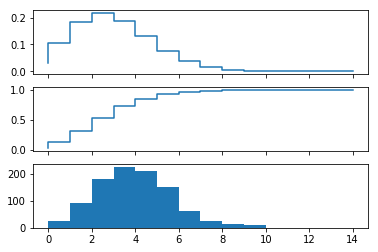

In [155]:
n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# grafica la "probability mass function" (PMF)
axes[0].step(n, X.pmf(n))

# grafica la "commulative distribution function" (CDF)
axes[1].step(n, X.cdf(n))

# grafica histograma de 1000 realizaciones de la variable estocástica X
axes[2].hist(X.rvs(size=1000));

In [156]:
# crea una variable aleatoria (contínua) con distribución normal
Y = stats.norm()

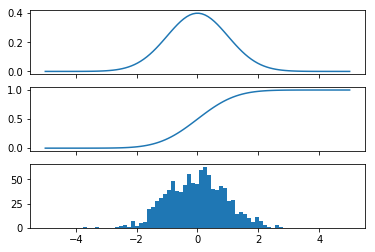

In [157]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# grafica la función distribución de probabilidad ("probability distribution function", PDF)
axes[0].plot(x, Y.pdf(x))

# grafica función de distribución acumulada ("commulative distributin function", CDF)
axes[1].plot(x, Y.cdf(x));

# grafica histograma de 1000 realizaciones aleatorias de la variable estocástica Y
axes[2].hist(Y.rvs(size=1000), bins=50);

Estadística:

In [158]:
X.mean(), X.std(), X.var() # distribución de Poission

(3.5, 1.8708286933869707, 3.5)

In [159]:
Y.mean(), Y.std(), Y.var() # distribucuón normal

(0.0, 1.0, 1.0)

### Test estadísticos

Test si dos conjuntos de datos aleatorios (independientes) vienen de la misma distribución:

In [160]:
t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print("t-statistic =", t_statistic)
print("valor p =", p_value)

t-statistic = 0.269051367251
valor p = 0.787917933653


Como el valor p es muy grande, no podemos descartar la hiopótesis que los dos conjuntos de datos aleatorios tienen medias *diferentes*.

Para testear si la media de una única muestra de datos tiene media 0.1 (la media verdadera es 0.0):

In [161]:
stats.ttest_1samp(Y.rvs(size=1000), 0.1)

Ttest_1sampResult(statistic=-4.512497211864428, pvalue=7.168215197470815e-06)

Un valor de p bajo significa que podemos descartar la hipótesis que la media de Y es 0.1.

In [162]:
Y.mean()

0.0

In [163]:
stats.ttest_1samp(Y.rvs(size=1000), Y.mean())

Ttest_1sampResult(statistic=-0.61610878825332327, pvalue=0.5379630745724534)

## Lectura adicional

* http://www.scipy.org - La página oficial del proyecto SciPy.
* http://docs.scipy.org/doc/scipy/reference/tutorial/index.html - Un tutorial sobre cómo comenzar a usar SciPy. 
* https://github.com/scipy/scipy/ - El códifo fuente de SciPy. 


In [164]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = './css/aeropython.css'
HTML(open(css_file, "r").read())